<a href="https://colab.research.google.com/github/harshit-dxt/deep-learning/blob/main/MNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST digits classifier

## Importing the libraries

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare Data

In [10]:
# Model / Data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Train / Test split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scaling the dataset
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Building the model

In [4]:
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Visualizing the model

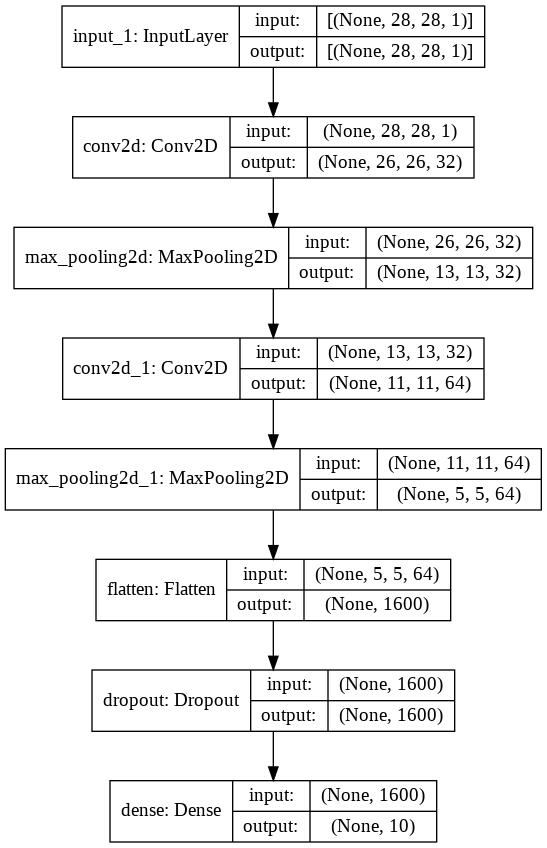

In [5]:
keras.utils.plot_model(model, show_shapes=True)

## Training the model

In [11]:
batch_size = 128
epochs = 15

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 43s 100ms/step - loss: 0.3651 - accuracy: 0.8907 - val_loss: 0.0815 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 42s 101ms/step - loss: 0.1082 - accuracy: 0.9664 - val_loss: 0.0553 - val_accuracy: 0.9853
Epoch 3/15
422/422 [==============================] - 42s 100ms/step - loss: 0.0822 - accuracy: 0.9739 - val_loss: 0.0474 - val_accuracy: 0.9885
Epoch 4/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0689 - accuracy: 0.9784 - val_loss: 0.0406 - val_accuracy: 0.9903
Epoch 5/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0602 - accuracy: 0.9815 - val_loss: 0.0413 - val_accuracy: 0.9895
Epoch 6/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0543 - accuracy: 0.9833 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0498 - accuracy: 0.9842 - val_loss: 0.0366 - val_accura

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Test Loss: 0.023437052965164185
Test Accuracy: 0.9915000200271606
